In [2]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model

In [3]:
# Set the style of display
plt.style.use("ggplot")
%matplotlib inline

In [4]:
# Load the star data
data = pd.read_csv('./data/image_database.txt')
data.head()

,starname,ra_act,dec_act,x_act_mx1,x_act_mx2,x_act_mx3,x_act_my3,x_act_my4,x_act_px1,x_act_px2,...,err_ang_py4,err_mag_py2,err_r_py2,err_ang_py2,err_mag_mx1,err_r_mx1,err_ang_mx1,err_mag_py1,err_r_py1,err_ang_py1
0,12Li,223.584,-24.642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.859260,NaN,NaN,84.859260,NaN,NaN,84.859260,3.647069,685.266791,84.859260
1,1Cen,206.422,-33.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.887684,NaN,NaN,34.887684,NaN,NaN,34.887684,1.757048,169.152306,34.887684
2,1Lup,228.656,-31.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.018541,NaN,NaN,94.018541,NaN,NaN,94.018541,3.190011,675.213623,94.018541
3,2Cen,207.361,-34.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.243282,NaN,NaN,93.243282,NaN,NaN,93.243282,1.435067,138.516537,93.243282
4,2Lup,229.458,-30.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.064243,NaN,NaN,93.064243,NaN,NaN,93.064243,3.538710,719.215056,93.064243


In [7]:
def fetch_data(camera, image_num):
    """ Fetches the star data from a given image taken from a given camera
    Parameters
    ----------
    camera : str
        The camera name
    image_num: str
        The number of an image from a camera. 
        If set to "." all the images will be returned
        
    Returns
    -------
    Pandas.DataFrames
        Returns a data fram with NaN entries removed
    """
    im_label = camera + image_num
    idx_err_r_mx = data.filter(regex=("err_r_" + im_label)).notnull().any(axis=1)
    df_err_r_mx = data.filter(regex=("err_r_" + im_label)).loc[idx_err_r_mx]

    idx_err_ang_mx = data.filter(regex=("err_ang_" + im_label)).notnull().any(axis=1)
    df_err_ang_mx = data.filter(regex=("err_ang_" + im_label)).loc[idx_err_ang_mx]

    idx_err_mag_mx = data.filter(regex=("err_mag_" + im_label)).notnull().any(axis=1)
    df_err_mag_mx = data.filter(regex=("err_mag_" + im_label)).loc[idx_err_mag_mx]

    # Join the above dataframes and remove NaN rows
    df = df_err_r_mx.join(df_err_mag_mx)
    df = df.join(df_err_ang_mx)
    df.dropna(inplace=True)
    
    return df
 
camera = "mx"
image_num = "2"

df = prepare_data(camera, image_num)

In [8]:
df.head()

,err_r_mx2,err_mag_mx2,err_ang_mx2
35,770.984141,2.827684,93.682335
36,460.124584,2.350709,128.987928
43,697.969711,2.269882,114.014828
49,640.854338,2.341144,119.470011
52,664.875172,2.445179,116.502640


In [9]:
df.describe()

,err_r_mx2,err_mag_mx2,err_ang_mx2
count,42.000000,42.000000,42.000000
mean,516.026965,2.081457,112.564229
std,261.100464,0.567165,28.041184
min,40.450732,1.091238,15.155884
25%,269.642318,1.610127,112.699100
50%,611.997707,1.975092,115.951747
75%,730.613785,2.517162,122.605594
max,944.161383,3.126335,170.359913


## Build a Regression Model


In [98]:
y_train = np.reshape(df.err_mag_mx2.as_matrix(), (df.shape[0], 1))
x_train = np.reshape(df.err_r_mx2.as_matrix(), (df.shape[0], 1))

# Create polynomial features
x_train_poly = np.hstack((x_train, np.power(x_train,2), np.power(x_train,3)))
#poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
#x_train_poly=poly.fit_transform(x_train)

# Fit a linear regression model
LR = linear_model.LinearRegression(normalize=True)
LR.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

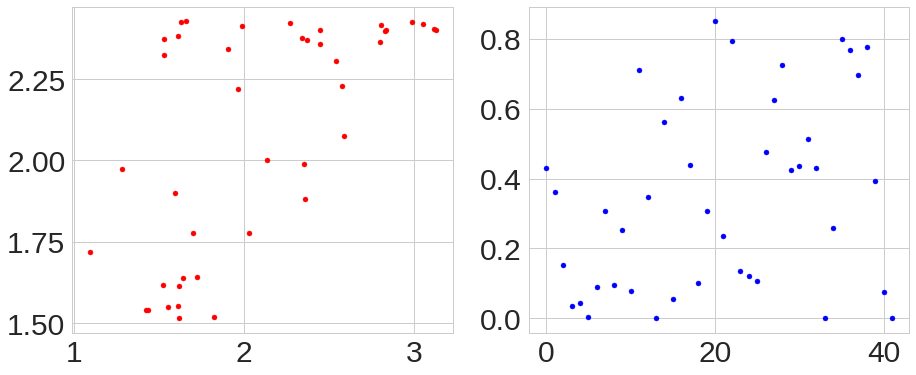

In [99]:
# Plot the predicted error magnitude vs "true" error magnitude
fig, axes = plt.subplots(1,2, figsize=(15,6))
y_pred = LR.predict(x_train_poly)
axes[0].plot(y_train, y_pred, '.r')

# Plot the absolute error
abs_err = np.abs(y_train - y_pred) 
axes[1].plot(abs_err, '.b')

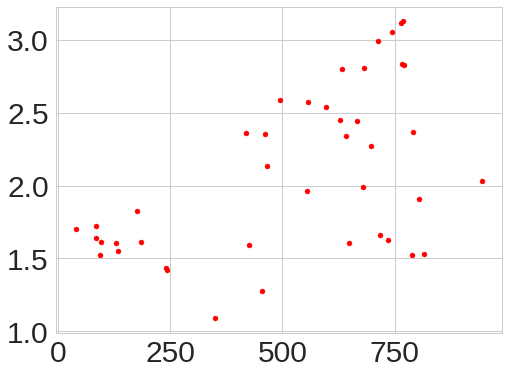

In [100]:
# Plot error vector's distance-to-center-pixel vs "true " error magnitude 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_train,y_train, '.r')

AttributeError: 'DataFrame' object has no attribute 'err_ang_mx2'

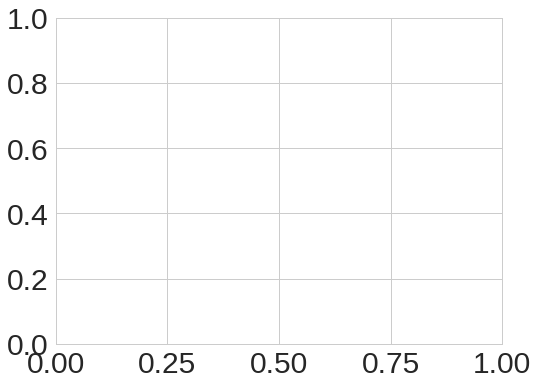

In [93]:
# Plot error vector's distance-to-center-pixel vs error velctor angle
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_train, df.err_ang_mx2.as_matrix(), '.r')

In [74]:
df.head()

,err_mag_mx2,err_r_mx2,err_ang_mx2
35,2.827684,770.984141,93.682335
36,2.350709,460.124584,128.987928
43,2.269882,697.969711,114.014828
49,2.341144,640.854338,119.470011
52,2.445179,664.875172,116.502640


In [75]:
LR.coef_

array([[ -5.07630313e-03,   1.69064560e-05,  -1.24235263e-08]])

In [76]:
LR.intercept_

array([ 1.95492623])

## Model Evaluation